<a href="https://colab.research.google.com/github/Raghu-1504/DeepLearning/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorboard


In [ ]:
from torch.utils import tensorboard
import torch

import torch.nn as nn

import torchvision ###image data set
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt


preprocessing images

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.50,.50),(0.50,.50,.5))])#  mean and standard deviation to be passed in normalization

In [ ]:
training_data = torchvision.datasets.CIFAR10(root = './data',train = True,download = True,transform = transform,)
test_data = torchvision.datasets.CIFAR10(root = './data',train = False,download = True,transform = transform,)

100%|██████████| 170498071/170498071 [00:14<00:00, 11684699.15it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
# %load_ext tensorboard

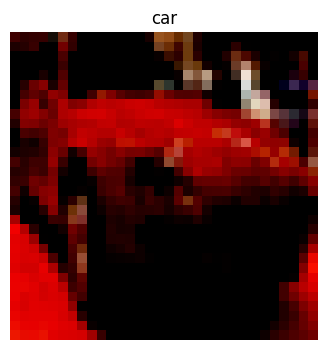

In [ ]:
lab = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
for i in range(5,len(training_data)):
  plt.figure(figsize = (4,4))
  img,label = training_data[i]
  plt.imshow(img.permute(1, 2, 0).numpy())
  plt.title(lab[label])
  plt.axis("off")
  break

In [ ]:
writer.add_image('my first image',img)
writer.close()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir = "/content/runs" --port = 6006

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-09-23 06:38:40.231355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

In [ ]:
from tensorboard import notebook
notebook.list()

No known TensorBoard instances running.


In [ ]:
notebook.display(port = 6006, height = 1000)

<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload \
  --logdir "/content/runs" \
  --name "My latest expariment" \
  --description "simple comparison of several hyperparameters" \
  --one_shot

2023-09-23 06:39:12.155657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/runs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py"

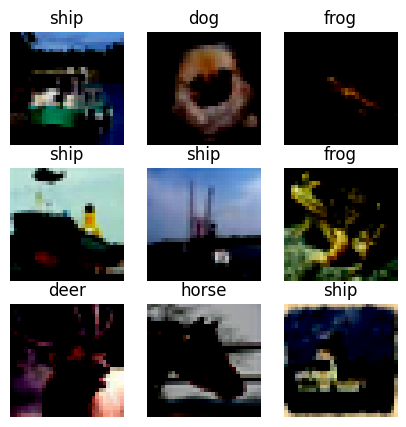

In [ ]:
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    img = img.permute(1, 2, 0).numpy()
    plt.title(lab[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [ ]:
batch_size = 64
traindata_loader = torch.utils.data.DataLoader(training_data,batch_size=batch_size,shuffle = True)
testdata_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle = True)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    """
in_channels: int, out_channels: int, kernel_size: _size_2_t, stride: _size_2_t = 1, padding: _size_2_t | str = 0, dilation: _size_2_t = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device: Any | None = None, dtype: Any | None = None) -> None
Initializes internal Module state, shared by both nn.Module and ScriptModule.


    """

    self.conv1 = nn.Conv2d(3,6,5,)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*10*10,120)
    self.fc2 = nn.Linear(120,80)
    self.fc3 = nn.Linear(80,10)
    self.dropout= nn.Dropout2d(.4)
  def forward(self,x):
    #print('shape of image before c1 ',x.shape)
    x = self.conv1(x)
    x = self.dropout(x)
    #print('shape of image after c1 ',x.shape)

    x= F.relu(x)
    x = self.pool(x)
    #print('shape of image after pool ',x.shape)

    x = self.conv2(x)
    x = self.dropout(x)
    #print('shape of image after c2 ',x.shape)

    x = F.relu(x)
    x = torch.flatten(x,1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.dropout(x)
    x = F.relu(x)
    x = self.fc3(x)
    return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = CNN()
model = model.to(device)
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
  (dropout): Dropout2d(p=0.4, inplace=False)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr= 0.1,weight_decay = 0.001)

In [ ]:
sample_input = torch.randn(batch_size, 3, 32, 32).to('cuda' if torch.cuda.is_available() else 'cpu')
writer.add_graph(model,sample_input)
writer.close()


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
for (X,y) in traindata_loader:
  print(X[0].shape)
  X = X.to(device)
  print(model(X))
  break

torch.Size([3, 32, 32])
tensor([[-3.7713e-02, -2.7828e-02,  3.1277e-04,  8.4941e-02, -9.5157e-02,
          6.6479e-02, -7.2046e-02,  6.4001e-02, -4.3785e-02, -5.5474e-02],
        [-6.6090e-02, -8.0229e-02, -5.2497e-02,  5.2267e-02, -8.0673e-02,
          1.8703e-02, -8.3277e-02,  7.1876e-02, -5.4650e-02, -3.7866e-02],
        [-3.9408e-02, -6.0725e-02,  7.5869e-03,  7.4600e-02, -1.1437e-01,
          6.5602e-02, -8.8263e-02,  4.3723e-02, -1.1243e-01, -4.1241e-02],
        [-4.8277e-02, -5.3389e-02,  5.1752e-03,  1.4493e-01, -4.5215e-02,
          5.8195e-02, -1.4305e-02,  4.7241e-02, -1.0349e-01, -3.5765e-02],
        [-3.4203e-02, -5.6313e-02, -3.0353e-02,  1.4351e-02, -4.7514e-02,
         -3.3211e-02, -1.9699e-01,  5.6162e-02, -7.8993e-02, -2.1733e-02],
        [-5.7579e-02, -4.5487e-02, -2.7016e-02,  5.9337e-02, -1.0079e-01,
          7.0457e-02, -4.6966e-02,  8.7375e-02, -5.2660e-02, -1.6335e-02],
        [-6.0574e-02, -5.7630e-02, -3.1691e-02,  7.7823e-02, -9.8068e-02,
        

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
def train(data,model,optim,loss_,epoch):
  total_loss = 0.0
  model.train()
  for batch,(X,y) in enumerate(data):
    X = X.to(device)
    y = y.to(device)


    pred = model(X)

    loss = loss_(pred,y)
    loss.backward()
    optim.step()
    optim.zero_grad()
    total_loss += loss.item()
    if batch % 100 == 0:
            print(batch)
            print(f'loss:{loss}')
  avg_loss = total_loss / len(data)
  writer.add_scalar("Training Loss", avg_loss, epoch)

In [ ]:
def test(model,data,loss_,epoch):
  model.eval()
  test_error,correct = 0,0
  size  = len(data.dataset)

  with torch.no_grad():

    for batch,(X,y) in enumerate(data):
      X = X.to(device)
      y = y.to(device)

      pred = model(X)
      loss = loss_(pred,y)
      test_error += loss.item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    print(f'test_correct {correct} out of {size} and  Accuracy is{correct/size*100}' )
    test_accuracy = correct / size
    test_loss = test_error / len(data)
    writer.add_scalar("Test Accuracy", test_accuracy, epoch)
    writer.add_scalar("Test Loss", test_loss, epoch)
    print('test error :::',test_error)
    return test_error



In [ ]:
epoch = 30
for i in range(epoch):
  print('epoch number is ',i+1)
  train(traindata_loader,model,optimizer,loss_fn,i)
  test(model,testdata_loader,loss_fn,i)




epoch number is  1
0
loss:2.2984471321105957
100
loss:2.159986972808838
200
loss:2.060650110244751
300
loss:2.191488027572632
400
loss:2.040285110473633
500
loss:2.142866849899292
600
loss:2.019106388092041
700
loss:2.071732759475708
test_correct 3310.0 out of 10000 and  Accuracy is33.1
test error ::: 285.9380131959915
epoch number is  2
0
loss:2.0390989780426025
100
loss:2.087239980697632
200
loss:1.7479597330093384
300
loss:1.9037712812423706
400
loss:1.7492878437042236
500
loss:1.7807016372680664
600
loss:1.8339521884918213
700
loss:1.8661000728607178
test_correct 3755.0 out of 10000 and  Accuracy is37.55
test error ::: 268.46149492263794
epoch number is  3
0
loss:1.9072072505950928
100
loss:1.9102455377578735
200
loss:1.653869867324829
300
loss:1.7258810997009277
400
loss:1.8410481214523315
500
loss:1.6990182399749756
600
loss:1.9156965017318726
700
loss:2.13500714302063
test_correct 3978.0 out of 10000 and  Accuracy is39.78
test error ::: 258.46779787540436
epoch number is  4
0
lo

In [ ]:
#!tensorboard dev auth revoke\
!tensorboard dev upload \
  --logdir "/content/runs" \
  --name "My latest expariment" \
  --description "simple comparison of several hyperparameters" \
  --one_shot

2023-09-25 05:18:56.379933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 05:18:57.302856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-25 05:18:59.290442: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 05:18:59.794366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!pwd

/content


In [ ]:
#torch.save(model.state_dict(), '/content/maybe.pth')
import torch

# Save the model's state_dict to a file named "maybe.pth" in the "/content/" directory
torch.save(model.state_dict(), '/content/maybe.pth')


## Inference

In [ ]:
import os

file_path = '/content/maybe.pth'
if os.path.exists(file_path):
    model = CNN()
    model.load_state_dict(torch.load(file_path))
else:
    print(f"File '{file_path}' does not exist.")

In [ ]:
model = CNN()
model.load_state_dict(torch.load('/content/maybe.pth'))

<All keys matched successfully>

In [ ]:
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
  (dropout): Dropout2d(p=0.4, inplace=False)
)

In [ ]:
def test(model,data,loss_,epoch):
  #model.eval()
  test_error,correct = 0,0
  size  = len(data.dataset)

  with torch.no_grad():

    for batch,(X,y) in enumerate(data):
      #X = X.to(device)
      #y = y.to(device)

      pred = model(X)
      loss = loss_(pred,y)
      test_error += loss.item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    print(f'test_correct {correct} out of {size} and  Accuracy is{correct/size*100}' )
    test_accuracy = correct / size
    test_loss = test_error / len(data)
    writer.add_scalar("Test Accuracy", test_accuracy, epoch)
    writer.add_scalar("Test Loss", test_loss, epoch)
    print('test error :::',test_error)
    return test_error



In [ ]:
test(model,testdata_loader,loss_fn,1)

test_correct 4460.0 out of 10000 and  Accuracy is44.6
test error ::: 241.63306403160095


241.63306403160095